In [17]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import multinomial

In [19]:
def beads_in_ring(radius):
    """
    Returns the number of beads in a ring of a given radius.

    Note that this is hexagonal ring, not a circular ring, so "radius" can't be
    interpreted as an exact euclidean distance.

    Args:
        radius (int): The radius of the ring.

    Returns:
        int: The number of beads in the ring.
    """
    return 6*radius

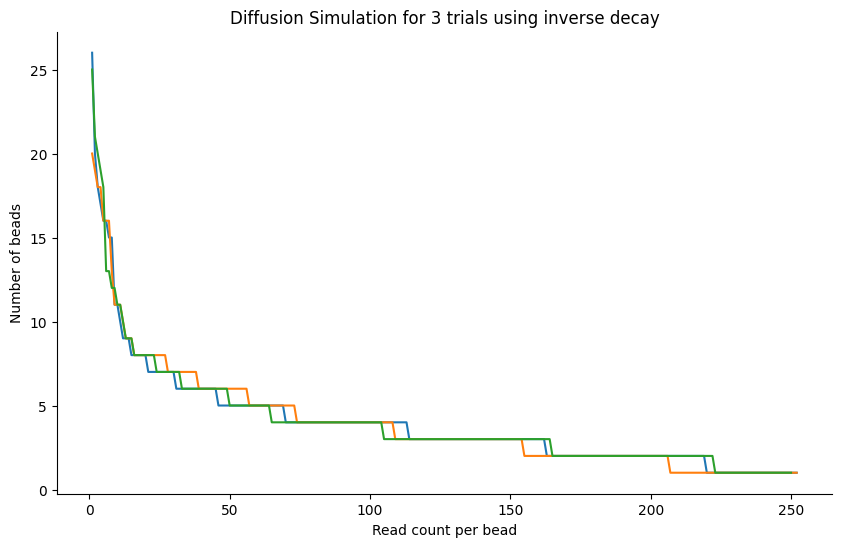

In [23]:
def prepare_array_for_mutinomial(decay_fn, max_radius):
    """Make the array of weights for the multinomial distribution for the number
    of reads from beads in the region around a central bead.

    Args:
        decay_fn (function): A function mapping the radius to the unnormalized
                             probability of getting a read from a bead at that
                             radius.
        max_radius (int): The maximum radius of the region around the central bead.

    Returns:
        np.ndarray: A normalized probability vector.
    """
    weights = [0.0]
    for i in range(1, max_radius):
        weights.extend([decay_fn(i)]*beads_in_ring(i))
        
    weights_array = np.array(weights)
    weights_array = weights_array/np.sum(weights_array)
    return weights_array

def simulate_diffusion(decay_fn, max_radius, read_count):
    """
    Simulates diffusion of particles in a 2D space.

    Args:
        decay_fn (function): A function mapping the radius to the unnormalized
                             probability of getting a read from a bead at that
                             radius.
        max_radius (int): The maximum radius of the region around the central bead.
        sample_size (int): The number of reads to simulate.

    Returns:
        np.ndarray: A sorted array of counts of reads per bead.
    """
    
    probs = prepare_array_for_mutinomial(decay_fn, max_radius)
    sample = multinomial.rvs(n=read_count, p=probs)
    # Throw away zero counts and sort in decreasing order.
    sample = np.sort(sample[sample > 0])[::-1]
    return sample
    

def plot_diffusion(decay_fn, decay_name, max_radius, read_count, trials):
    plt.figure(figsize=(10, 6))
    
    max_y_value = 0  # to help set the yticks later
    
    for _ in range(trials):
        results = simulate_diffusion(decay_fn, max_radius, read_count)
        max_y_value = max(max_y_value, max(results))
        
        sns.lineplot(x=range(1, len(results) + 1), y=results, lw=1.5)
    
    plt.xlabel("Read count per bead")
    plt.ylabel("Number of beads")
    plt.title(f"Diffusion Simulation for {trials} trials using {decay_name} decay")
    
    sns.despine()
    plt.show()


plot_diffusion(lambda x: 1/x, "inverse", max_radius=10, read_count=1000, trials=3)


https://en.wikipedia.org/wiki/Rayleigh_distribution

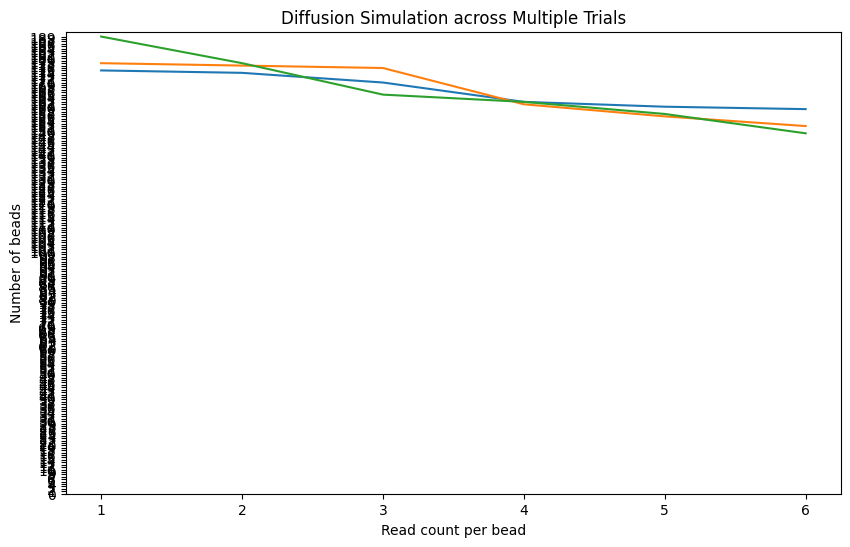

In [ ]:

plot_diffusion(lambda x: np.exp(-float(x)**20), max_radius=10, read_count=1000, trials=3)